In [4]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [5]:
import pandas as pd
import numpy as np
# Load the dataset
df = pd.read_excel('/content/Online_Retail[1].xlsx')

#clean the data
data=df.dropna(subset=['CustomerID'])
data=data[data['Quantity']>0]
data=data.drop_duplicates()

# display the first few rows
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


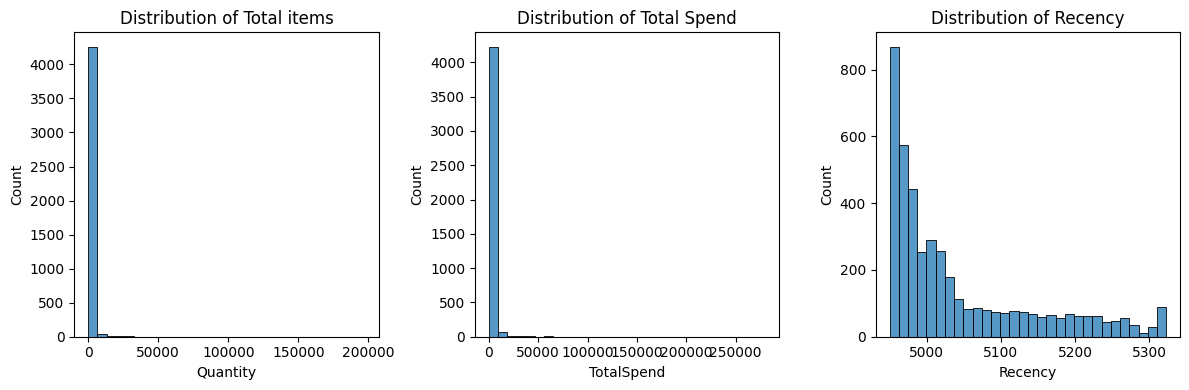

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics per customer
customer_data =data.groupby('CustomerID').agg({'Quantity':'sum','UnitPrice': lambda x:(x*data.loc[x.index, 'Quantity']).sum(),'InvoiceDate': lambda x: (pd.Timestamp.now()- x.max()).days}).rename(columns={'UnitPrice': 'TotalSpend','InvoiceDate': 'Recency'})

# Visualize distributions
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(customer_data['Quantity'], bins=30)
plt.title('Distribution of Total items')
plt.subplot(1,3,2)
sns.histplot(customer_data['TotalSpend'], bins=30)
plt.title('Distribution of Total Spend')
plt.subplot(1,3,3)
sns.histplot(customer_data['Recency'], bins=30)
plt.title('Distribution of Recency')
plt.tight_layout()
plt.show()

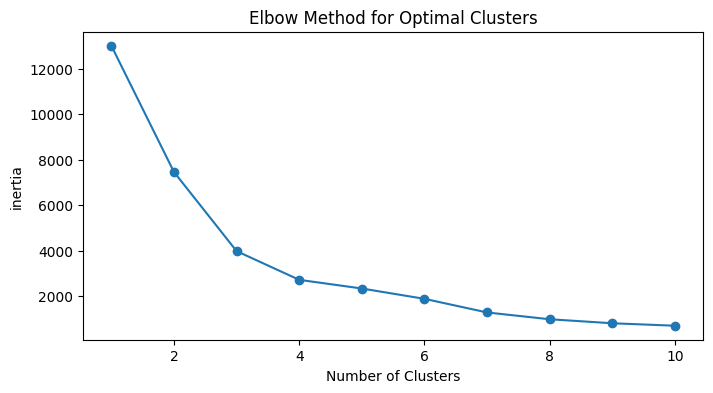

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# sacle the features
scaler = StandardScaler()
features = scaler.fit_transform(customer_data[['Quantity', 'TotalSpend', 'Recency']])

#Determine optimal clusters (Elbow method)
inertia=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(features)
  inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,4))
plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('inertia')
plt.show()


#apply K-means with optimal k
kmeans=KMeans(n_clusters=3,random_state=42)
customer_data['Cluster']=kmeans.fit_predict(features)

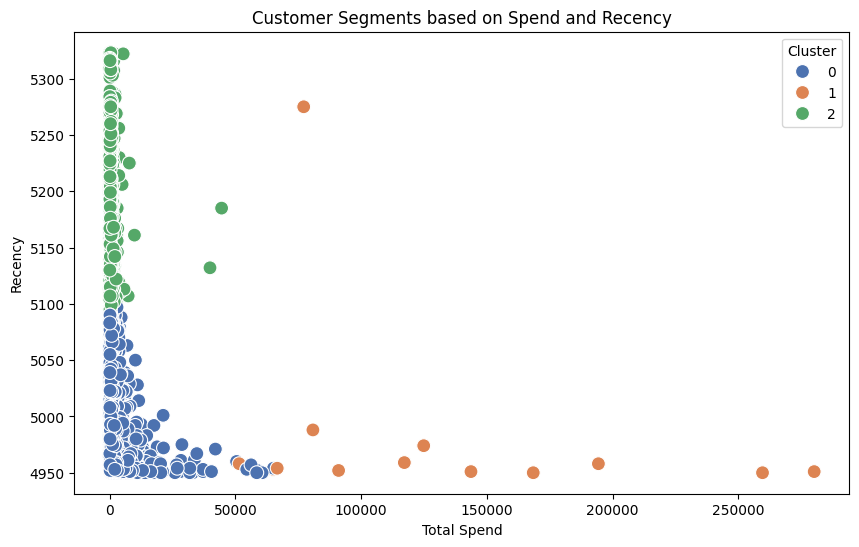

Cluster Summary:
          Quantity  TotalSpend  Recency
Cluster                               
0         1191.11     2012.74  4991.12
1        75330.38   132375.36  4982.54
2          288.17      572.76  5197.65


In [9]:
#visualize the plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=customer_data,x='TotalSpend',y='Recency',hue='Cluster',palette='deep',s=100)
plt.title('Customer Segments based on Spend and Recency')
plt.xlabel('Total Spend')
plt.ylabel('Recency')
plt.legend(title='Cluster')
plt.show()

#Summary of clustes
cluster_summary = customer_data.groupby('Cluster').agg({'Quantity': 'mean', 'TotalSpend': 'mean', 'Recency': 'mean'}).round(2)
print("Cluster Summary:\n",cluster_summary)

CUSTOMER SEGMENTATION ANALYSIS

    PROJECT DESCRIPTION
This projects segment customers based on their purchasing behaviour using the online retail dataset to help businesses target marketing strategies.

    DATA SOURCE
-[online retail dataset](https://archive.ics.ucl.edu/ml/datasets/online+retail)

    TOOLS and LIBRARIES
- Python, pandas, numpy, matplotlib,scikit-learn,seaborn

    
    APPROACH
1. Loaded and cleaned the dataset (removed missing customerIDs, duplicates, negative quantites.
2. Calculated recency, frequency, monetary value for each customer.
3. Applied K-means clustering after scaling features.
4. Visualized and Interpreted the segments.

    
    FINDINGS
- Identified 3 customers segments (e.g. high spenders, occasional buyers)
- Visualizations show clear separation based on spend and recency.

    
    How to run
1. Upload 'online_retail.xlsx' to colab
2. Run all cells in this notebook.

